**Trabajo Práctico 2 - Matrices de Insumo-Producto**

**Consigna 1** cambiar

Para demostrar la convergencia de la suma infinita partimos de la ecuación 

$$
(I-A)^{-1} = I + A + A^{2} + \dots\ 
$$

que podemos reescribirla como 

$$
(I-A)^{-1} = \sum_{i=0}^{∞}A^{i}
$$

Y como la suma infinita de una serie es igual al límite de la sucesión de las sumas parciales de la serie planteo:

$$ 
(I-A)^{-1} = \lim_{N \to \infty} \sum_{i=0}^{N}A^{i}
$$

Multiplicando a ambos lados por $(I-A)$ obtenemos

$$
I = (I-A)\lim_{N \to \infty} \sum_{i=0}^{N}A^{i}
$$

Al ser (I-A) un término lineal, podemos reescribir

$$
I = \lim_{N \to \infty} \sum_{i=0}^{N}(I-A)A^{i}
$$

Desarrollando la multiplicación obtenemos

$$ 
I = \lim_{N \to \infty} \sum_{i=0}^{N}A^{i}-A^{i+1}
$$

Expandiendo la sumatoria obtenemos 

$$
I = \lim_{N \to \infty} (I-A)+(A-A^{2})+(A^{2}-A^{3})+\dots+(A^{N-1}-A^{N})+(A^{N}-A^{N+1})
$$

Luego observamos que todos los términos intermedios se cancelan en la serie, y solo quedan el primer término y el último. Entonces, esto se reduce a  

$$
I = \lim_{N \to \infty} I - A^{N+1}
$$


El límite de la resta es la resta de los límites, y como la identidad no depende de N, entonces

$$
I = I - \lim_{N \to \infty} A^{N+1}
$$







**Consigna 2**

Para graficar los dos vectores pedidos se utilizaron las funciones **elevarMatriz**, que calcula la potencia de A para cada exponente, y **crearVector**, que ubica la norma de las potencias de A en las posiciones del vector. Luego se realizó un gráfico de cada vector.

In [1]:
import numpy as np
import scipy.linalg as sc
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import solve_triangular
from sklearn.cluster import KMeans
from funcionesTP2 import elevarMatriz, crearVector
A1 = np.array([[0.186, 0.521, 0.014, 0.32, 0.134],
               [0.24, 0.073, 0.219, 0.013, 0.327],
               [0.098, 0.12, 0.311, 0.302, 0.208],
               [0.173, 0.03, 0.133, 0.14, 0.074],
               [0.303, 0.256, 0.323, 0.225, 0.257]])
vector1 = crearVector(A1)
A2 = np.array([[0.186, 0.521, 0.014, 0.32, 0.134],
               [0.24, 0.073, 0.219, 0.013, 0.327],
               [0.098, 0.12, 0.311, 0.302, 0.208],
               [0.173, 0.03, 0.133, 0.14, 0.074],
               [0.003, 0.256, 0.323, 0.225, 0.257]])

vector2 = crearVector(A2)

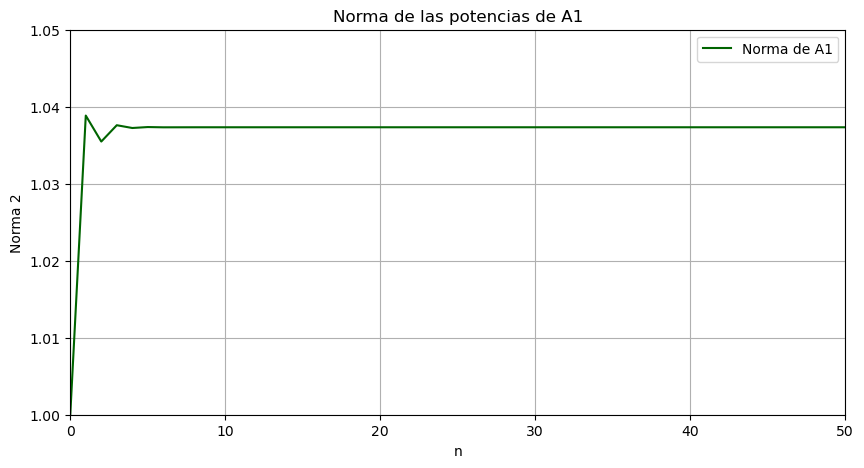

In [2]:
# Gráfico de la norma de A1
plt.figure(figsize=(10, 5))  
plt.plot(vector1, label='Norma de A1', color='darkgreen')
plt.title('Norma de las potencias de A1')
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.xlim(0, 50)  
plt.ylim(1, 1.05)  
plt.grid()
plt.legend()
plt.show()

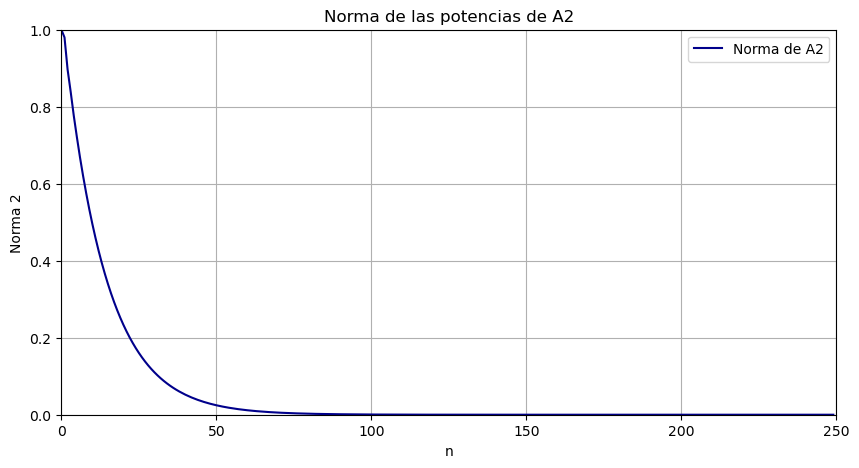

In [3]:
# Gráfico de la norma de A2
plt.figure(figsize=(10, 5))  
plt.plot(vector2, label='Norma de A2', color='darkblue')
plt.title('Norma de las potencias de A2')
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.xlim(0, len(vector2))
plt.ylim(0, 1)  
plt.grid()
plt.legend()
plt.show()

Estos gráficos nos dan un indicio de que la serie de potencias de A2 converge mientras la de A1 no. Para A2 todas sus potencias tienen un valor menor que 1, lo que nos indica que todos sus autovalores son menores que 1 en módulo. Por lo tanto, las potencias de A disminuye a medida que su exponente aumenta y lleva a la convergencia de la serie de potencias.

**Consigna 3**

Para encontrar el mayor autovalor de las matrices A1 y A2 se utilizaron las funciones **metodoDeLaPotencia** y **obtenerAutovalorAproximado**. Se implementó el método Monte Cralo para calcular un promedio de los autovalores de 250 vectores distintos.

In [4]:
from funcionesTP2 import metodoDeLaPotencia, obtenerAutovalorAproximado, monteCarlo
promedio1, desvio_estandar1 = monteCarlo(A1)

promedio2, desvio_estandar2 = monteCarlo(A2)

tabla_resultados = {
    'Matriz': ['A1', 'A2'],
    'Promedio Autovalor': [promedio1, promedio2],
    'Desviación Estándar': [desvio_estandar1, desvio_estandar2]
}

print(pd.DataFrame(tabla_resultados))

  Matriz  Promedio Autovalor  Desviación Estándar
0     A1            1.000000         0.000000e+00
1     A2            0.927651         2.263161e-16


**Consigna4**

a) Para calcular la serie de potencias $(I-A)^{-1}$ para A1 y A2 se utilizó la función **serieDePotencias**. Luego la graficamos.

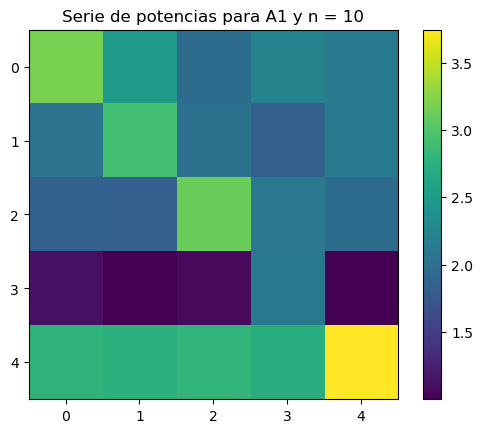

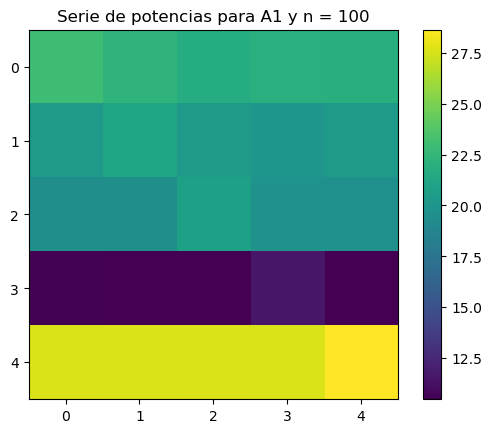

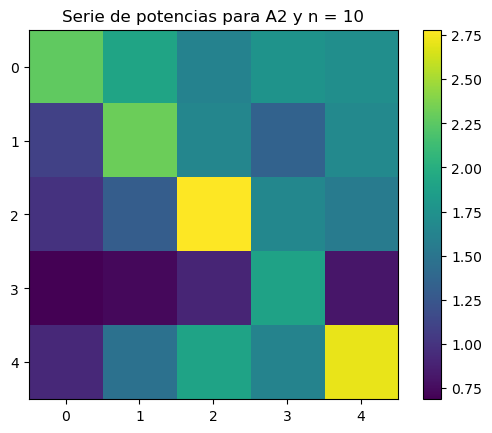

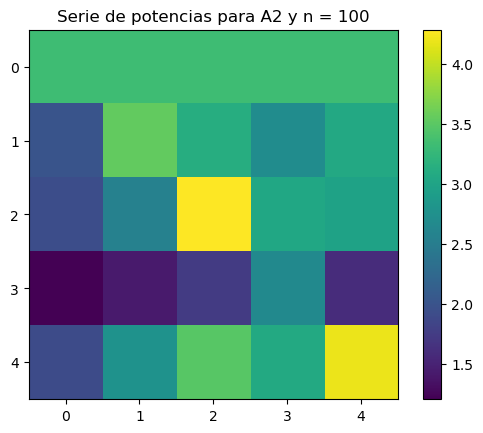

In [5]:
from funcionesTP2 import serieDePotencias

serie10_A1 = serieDePotencias(A1, 10)
serie100_A1 = serieDePotencias(A1, 100)
serie10_A2 = serieDePotencias(A2, 10)
serie100_A2 = serieDePotencias(A2, 100)

#Gráfico de la serie de potencias para A1 y n = 10 
plt.imshow(serie10_A1)
plt.title("Serie de potencias para A1 y n = 10")
plt.colorbar() 
plt.show()

#Gráfico de la serie de potencias para A1 y n = 100 
plt.imshow(serie100_A1)
plt.title("Serie de potencias para A1 y n = 100")
plt.colorbar() 
plt.show()

#Gráfico de la serie de potencias para A2 y n = 10 
plt.imshow(serie10_A2)
plt.title("Serie de potencias para A2 y n = 10")
plt.colorbar() 
plt.show()

#Gráfico de la serie de potencias para A2 y n = 100 
plt.imshow(serie100_A2)
plt.title("Serie de potencias para A2 y n = 100")
plt.colorbar() 
plt.show()



*b*) ¿Hay convergencia para ambas matrices? Argumentar la respuesta. <br>Para analizar la convergencia de ambas matrices, observamos el comportamiento de sus series de potencias.<br>
En el caso de la matriz **A2**, los gráficos muestran una variación mínima entre los elementos a medida que avanzamos en las potencias. Esta estabilidad en los valores indica que, con cada potencia, los elementos de **A2**se estabilizan en valores muy similares, sugiriendo que la serie de potencias de la misma converge. <br>
Por otro lado, en el caso de **A1**, los gráficos muestran un cambio considerable en los elementos de la matriz a medida que avanzamos en la serie de potencias. Este comportamiento indica que los valores no se estabilizan, sino que siguen variando, lo cual sugiere que la serie de potencias de **A1** no converge. 

c)
Si queremos establecer alguna regla sobre la tendencia a converger de una matriz podemos observar la relación que existe entre el cálculo de autovalores y autovectores de una matriz y el valor de su norma (euclidea en este caso), que es lo más utilizado en los trabajos hasta el momento.
Si el mayor autovalor de la matriz, que es el radio espectral de esta, y que resulta ser el infimo sobre todas las "n" mas subordinadas, tiene un valor menor a 1, al calcular la serie de potencias de la matriz y la norma de cada una de las matrices en la suma parcial, observaremos que estas tienden a 0.
Por lo que la matriz converge a una de valores nulos.
"
multiplicar adentro de la norma es lo mismo que multiplicar afuera
"

d) Como mencionamos en el inciso b), la convergencia existe para **A2**. Luego calculamos su error con la función crearVectorError y lo graficamos. 

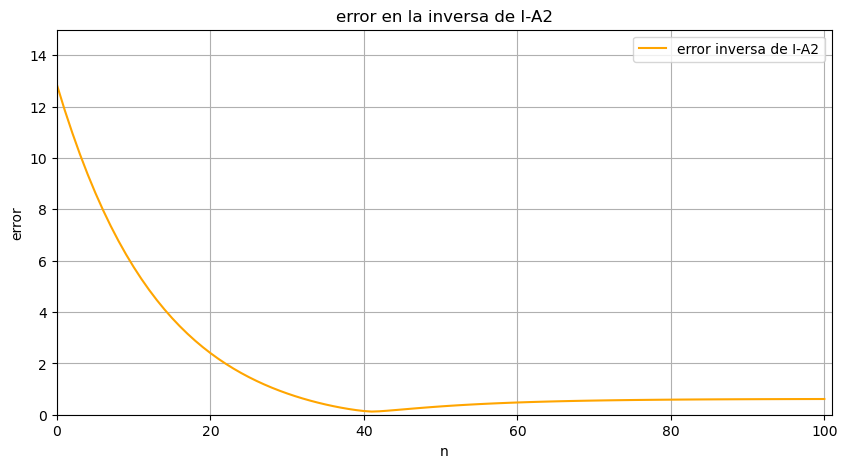

In [6]:
from funcionesTP2 import intercambiarfilas, calcularLU, inversaLU, crearVectorError
Id_menos_A2 = np.array([[0.832, -0.521, -0.014, -0.32, -0.134],
               [-0.24, 0.927, -0.219, -0.013, -0.327],
               [-0.098, -0.12, 0.689, -0.302, -0.208],
               [-0.173, -0.03, -0.133, 0.86, -0.074],
               [-0.003, -0.256, -0.323, -0.225, 0.743]])

L2, U2, P2 = calcularLU(Id_menos_A2)
inversa_Id_menos_A2 = inversaLU(L2, U2, P2)

e2_10 = crearVectorError(A2, inversa_Id_menos_A2, 10)
e2_100 = crearVectorError(A2, inversa_Id_menos_A2, 100)

plt.figure(figsize=(10, 5))
plt.plot(e2_100, label='error inversa de I-A2', color='orange')
plt.title('error en la inversa de I-A2')
plt.xlabel('n')
plt.ylabel('error')
plt.xlim(0, len(e2_100))
plt.ylim(0, 15)
plt.grid()
plt.legend()
plt.show()

**Consigna 5**

Para retomar las matrices insumo-producto de los paises Costa Rica y Nicaragua (asignados en el trabajo práctico número 1), volvimos a utilizar las funciones creadas en ese trabajo para generarlas. Luego, con la función **metodoDeLaPotencia** calculamos el mayor autovector de ambas y con **obtenerAutovalorAproximado** su autovalor.

In [7]:
from funcionesTP2 import generadorMatrizZ, produccionesPais, IdxP, AInsumoProducto
data = pd.read_excel('matrizlatina2011_compressed_0.xlsx',sheet_name=1)

In [8]:

ZCriCri = generadorMatrizZ(data,"CRI","CRI")
pCri = produccionesPais(data,"CRI")
IdPCri = IdxP(pCri)
L_Id_Cri, U_Id_Cri, P_Id_Cri =calcularLU(IdPCri)
IdCri_inv = inversaLU(L_Id_Cri, U_Id_Cri, P_Id_Cri)
ACriCri = AInsumoProducto(ZCriCri,IdCri_inv)
AvecCriCri = metodoDeLaPotencia(ACriCri, 50)
AvalCriCri = obtenerAutovalorAproximado(ACriCri, AvecCriCri)

ZNicNic = generadorMatrizZ(data,"NIC","NIC")
pNic = produccionesPais(data,"NIC")
IdPNic = IdxP(pNic)
L_Id_Nic, U_Id_Nic, P_Id_Nic =calcularLU(IdPNic)
IdNic_inv = inversaLU(L_Id_Nic, U_Id_Nic, P_Id_Nic)
ANicNic = AInsumoProducto(ZNicNic,IdNic_inv)
AvecNicNic = metodoDeLaPotencia(ANicNic,150)
AvalNicNic = obtenerAutovalorAproximado(ANicNic, AvecNicNic)

In [9]:
print("mayor autovalor Costa Rica:", AvalCriCri)
print("mayor autovalor Nicaragua:", AvalNicNic)

mayor autovalor Costa Rica: 0.27433480202748795
mayor autovalor Nicaragua: 0.26069619164879065


**Consigna 6**

a) Sea $z \in \mathbb{R}^{n}$, veamos que sucede con al multiplicar este con $E_n$:

$$E_nz = (I_n - \frac{1}{n}ee^t)z$$

Distribuimos $z$:

$(I_nz - \frac{1}{n}eetz)$ = $(z - \frac{1}{n}e(e^tz))$

Ver que $(e^tz)$, es producto escalar ya que $e^t$ es un vector fila en $\mathbb{R}^{n}$ donde todos sus elementos son 1s. Por ello este producto escalar es congurente con la suma de los componentes del vector $z$. Notamos,

$<e^t,z>$ = $\sum_{i=1}^{n} z_i $

Siguendo:

$(z - \frac{1}{n}e\sum_{i=1}^{n} z_i)$

Expresamos para simplificar: 

$(e\sum_{i=1}^{n} z_i) = \left(\begin{matrix} \sum_{i=1}^{n} z_i \\ \vdots \\ \sum_{i=1}^{n}z_i\end{matrix}\right)=S$ 

Quedando: 

$(z - \frac{S}{n})$

Luego, veamos que sucede al calcular el promedio del vector resultante

$\frac{1}{n}\sum_{j=1}^{n}(E_nz)$:

$\frac{1}{n}\sum_{j=1}^{n}(z -\frac{S}{n} )$ <br>
Distribuimos: 

$(\frac{1}{n}\sum_{j=1}^{n}z_j -\frac{1}{n}\sum_{j=1}^{n}\frac{S}{n})$

Y nos queda por un lado: 

$(\frac{1}{n}\sum_{j=1}^{n}z_j)$ el cual calcula el promedio del vector z, escrito anteriomente como S. <br>
Por el otro  $\frac{1}{n}\sum_{j=1}^{n}\frac{S}{n}$, como S no depende del indice j, queda como: 
$\frac{1}{n}n\frac{S}{n}$ <br>
Por ultimo: 
$$ \frac{S}{n} - \frac{1}{n}n\frac{S}{n} = \frac{S}{n} - \frac{S}{n} = 0$$

**Analicemos que sucede con** $E_nA$ <br>

Anteriomente, observamos que multiplicar un vector cualquiera en $\mathbb{R}^{n \times n}$ por la matriz $E_n$ tiene el efecto de restarle a cada componente su promedio, es decir, centra el vector alrededor de cero.
De este modo si multiplicamos una matriz $A \in \mathbb{R}^{n}$ por $E_n$,está centralizara cada vector columna de A, dandonos así una versión centralizada de la matriz $A$.



b) Consideramos la base de vectores $\{ e, d_2, \dots, d_n \}$ de $\mathbb{R}^{n}$ donde $\{d_2, \dots, d_n \}$ es una base de $<e>^\perp$.

Observemos que sucede al multiplicar $E_ne$:

$E_ne$=$(I_n-\frac{1}{n}ee^t)e$

Distribuimos:

$(I_ne-\frac{1}{n}ee^te) = (e-\frac{1}{n}ee^te)$

Notar que: $e^te = n$ ya que es la multiplicación entre un vector fila y columna donde ambos vectores tienen 1s como elementos.

Nos queda como:

$$(e-\frac{1}{n}en) = (e-e) = 0$$

Ver que esto cumple con $E_ne=λe$ con $λ=0$.
Podemos decir que $e$ es un autovector asociado al autovalor 0 de la matriz $E_n$, de multiplicidad artimetica igual a 1.

Ahora vemos que pasa con multiplicar un vector cualquiera de la base $\{d_2, \dots, d_n \}$ con la matriz $E_n$:

$E_nd_n=(I_n-\frac{1}{n}ee^t)d_n=(d_n-\frac{1}{n}ee^td_n)$

La multipicación entre $e^td_n = 0$ ya que le vector $d_n \in <e>^\perp$.

Entonces:
$$E_nd_n=(d_n-0)=d_n$$

Contemplar que la multiplicación corresponde con $E_nd_n=λd_n$ con $λ=1$.Luego concluimos que $d_n$ es un autovector asociado al autovalor 1 de la matriz $E_n$.En cuanto a su multiplicidad aritmetica esta sería $n-1$, pues la base de vectores $\{d_2, \dots, d_n \}$ es de dimensión $n-1$.

En cuanto la imagen y el nucleo de En.<br>

El $Nu(E_n)=e$ pues es el unico vector que cumple $E_ne=0$ (demostrado anteriormente en cuanto autovectores).

En cuanto a la imagen de este, sabemos que la imagen de una matriz esta compuesta por todo los posibles vectores que se obtienen al multiplicar la matriz por un vector cualquiera. Osea se tiene que cumplir que:

$∀{w}\in\mathbb{R}^{n}, \exists{v\in\mathbb{R}^{n}}/ w=Av$

Por lo que ya trabajamos con una base vectores, la cual cumple con lo mencionado, la cual corresponde a la base generada por $<e>^\perp$.
Por ende, la base $\{d_2, \dots, d_n \}$, es la $Im(E_n)$.

Además el $Nu(E_n)=<e>$ y  la $Im(E_n)=<e>^\perp$ cumplen con lo establecido por el Teorema de la Dimensión tal que:

$$dim(E_n)= dim(Nu(E_n)) + dim(Im(E_n))$$

Donde la $dim(E_n)=n$, $dim(Nu(E_n))=1$ y la $dim(Im(E_n))=n-1$.

c) Una matriz P se dice de proyección ortogonal si $Nu(P)\perp Im(P)=0$. Osea que $\forall{u}\in Nu(P)$ y $\forall{v}\in Im(P)$  su  $<u,v>=0$.

Sabemos que el nucleo de En está formado por $<e>$ y su imagen por la base $\{d_2, \dots, d_n \}$ la cual pertenece a $<e>^\perp$.
Inmediatamente sabemos que el para todos aquellos vectores pertenecientes a $Nu(E_n)$ o $Im(E_n)$, su producto escalar siempre dara 0.

Pues, $Nu(E_n)=<e>$ y $Im(E_n)=<e>^\perp$ donde $\forall{v}\in<e>^\perp, u\in<e> \leftrightarrow <v,u>=0$.

d)

$(I) E_n$ es una matriz ortogonal (Falso).

Si $E_n$ es una matriz ortogonal entonces $EnEn^t=En^tEn=I_n$ .

Comprobemoslo:

$EnEn^t=(I_n-\frac{1}{n}ee^t)(I_n-\frac{1}{n}ee^t)$
Distribuimos:

$(I_n-\frac{1}{n}ee^t-\frac{1}{n}ee^t+\frac{1}{n^2}ee^tee^t)$

donde $e^te=n$.

Entonces nos queda:

$(I_n-\frac{1}{n}ee^t-\frac{1}{n}ee^t+\frac{1}{n}ee^t)=(I_n-\frac{1}{n}ee^t)$

Pero $E_nE_n^t \neq I_n$.

$(II) E_n$ es una matriz singular (Verdadero).

Si $E_n$ es singular, su $Nu(E_n)\neq0$.
Y como comprobamos anteriormente en el item b), el $Nu(E_n)=<e>$.


$(III) E_n$ es definida positiva (Falso).

Veamos si $E_n$ cumple con la definición de definida positiva tal que $v^tE_nv>0$.

Empezemos:

$v^tE_nv=v^t(I_n-\frac{1}{n}ee^t)v$

Distribuimos:

$(v^tI_n-\frac{1}{n}v^tee^t)v=(v^tv-\frac{1}{n}v^tee^tv)$

Reescribimos, $v^tv=\|v\|^2_2$ y a $v^te=(e^tv)^t$:


$\left( \| v \|_2^2 - \frac{1}{n}(e^T v)^T (e^tv) \right)$

Notamos que, $(e^T v)^T (e^tv)=\|ev \|_2^2= \|e \|_2^2\|v \|_2^2$ y como e es un vector de tamaño n de solo 1s,$\|e \|_2^2=1$.

$\left( \| v \|_2^2 - \frac{1}{n} \| e \|_2^2 \| v \|_2^2 \right)$=$\left( \| v \|_2^2 - \frac{1}{n}n \| v \|_2^2 \right)$

Por ultimo queda,

$\left( \| v \|_2^2 - \| v \|_2^2 \right)=0 \not> 0$

$(IV)Tr(E_n)=n-1$ (Verdadero).

Calculemos la $Tr(E_n)$:

$Tr(E_n)=Tr(I_n) - Tr(\frac{1}{n}ee^t)$

Donde $Tr(I_n)=n$ y veamos más a fondo $tr(\frac{1}{n}ee^t)$

La matriz generada por $(\frac{1}{n}ee^t)$ se ve de la forma:

$(\frac{1}{n}ee^t)=\begin{pmatrix}
\frac{1}{n} & \frac{1}{n} & \dots & \frac{1}{n} \\
\frac{1}{n} & \frac{1}{n} & \dots & \frac{1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{1}{n} & \frac{1}{n} & \dots & \frac{1}{n}
\end{pmatrix}
$

Por ende, la $tr(\frac{1}{n}ee^t)=\sum_{i=1}^{n}\frac{1}{n}$ y la \sum_{i=1}^{n}\frac{1}{n}$ converge a 1.

Finalmente,

$Tr(E_n)=Tr(I_n) - Tr(\frac{1}{n}ee^t)= n-1$

**Consigna 7**


Para realizar el análisis en componentes principales, primero utilizaremos las función del trabajo práctico número 1 para obtener la matriz $A^{rr}$ (matriz de coeficientes tecnicos intrarregional) de Costa Rica. La llamamos *ACriCri*.

Luego, calculamos la matriz de covarianzas *C*.

In [10]:
I40 = np.eye(40)
v40 = np.ones(40)
E_40 = I40 - 1/40*(np.outer(v40,v40))

ACriCri_normalizada = np.dot(E_40, ACriCri)

C = np.dot(ACriCri_normalizada.T, ACriCri_normalizada) / 39

print(C)

[[1.64673935e-04 1.82135355e-04 0.00000000e+00 ... 1.39468911e-04
  5.96285721e-05 9.02354489e-05]
 [1.82135355e-04 5.15081665e-04 0.00000000e+00 ... 8.91389389e-05
  3.40812253e-05 7.58220819e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.39468911e-04 8.91389389e-05 0.00000000e+00 ... 1.02938692e-03
  3.07049595e-04 3.72516979e-04]
 [5.96285721e-05 3.40812253e-05 0.00000000e+00 ... 3.07049595e-04
  2.15662480e-04 2.05484162e-04]
 [9.02354489e-05 7.58220819e-05 0.00000000e+00 ... 3.72516979e-04
  2.05484162e-04 2.23598104e-04]]


Posteriormente, obtenemos una aproximación de los dos primeros autovalores utilizando el método de la potencia. Para ello, implementamos una nueva función llamada **metodo_de_la_potencia**. Esto se debe a que ya no utilizamos el método de Monte Carlo, sino un criterio de parada. A diferencia de la técnica de Monte Carlo, en este caso aplicamos un criterio de convergencia específico: calculamos la norma 2 de la diferencia entre los últimos dos autovectores obtenidos. Si esta norma es menor que un valor de tolerancia, $\epsilon$ , consideramos que el método ha convergido y detenemos la búsqueda del autovalor.

In [11]:
from funcionesTP2 import metodo_de_la_potencia
v1, lambda1 = metodo_de_la_potencia(C)
print("Primer autovalor:", lambda1)
print("Primer autovector:", v1)

C_prima = C - lambda1 * np.outer(v1, v1)
v2, lambda2 = metodo_de_la_potencia(C_prima)
print("Segundo autovalor:", lambda2)
print("Segundo autovector:", v2)

Primer autovalor: 0.0156769568443091
Primer autovector: [0.06206739 0.02248714 0.         0.08322943 0.53969407 0.25809074
 0.46609364 0.33800246 0.0221903  0.06383101 0.02824322 0.04238905
 0.05382215 0.50410411 0.02562079 0.00783983 0.01828509 0.04823808
 0.05103316 0.03983039 0.03454625 0.02687568 0.02687568 0.02555451
 0.02611424 0.02748166 0.02611424 0.0392098  0.01994989 0.04473059
 0.         0.02991103 0.0305711  0.05077856 0.00866414 0.03822454
 0.07333327 0.06578537 0.03050403 0.04086483]
Segundo autovalor: 0.008726070228831132
Segundo autovector: [ 0.04814396  0.05286177  0.          0.35712521 -0.18207377 -0.00172509
 -0.01446456 -0.07127391  0.10026751  0.301961    0.12560179  0.1329181
  0.16618885 -0.18205422  0.13344194  0.03753009  0.07759349  0.204183
  0.22243526  0.13232454  0.17952911  0.10897862  0.10897862  0.11110218
  0.11374756  0.12174864  0.11374756  0.17929289  0.09329558  0.17862121
  0.          0.14323499  0.06870035  0.2233413   0.09165041  0.15630067
 

**Consigna 8**

In [12]:
from funcionesTP2 import proyectar_datos
ACriCri_proyectada = proyectar_datos(ACriCri, v1, v2)
print(ACriCri_proyectada)

[[ 7.58925982e-01 -1.72584141e-01]
 [ 1.33372940e-02 -1.61211226e-03]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.45648608e-03  8.25275116e-03]
 [ 4.16162231e-02 -4.00239147e-03]
 [ 2.17381911e-02  1.07105398e-03]
 [ 3.87461914e-02  2.93437356e-03]
 [ 3.50730697e-02  4.98032955e-03]
 [ 9.90347604e-04  3.68456767e-03]
 [ 8.97726280e-03  4.24681269e-02]
 [ 2.41912968e-03  8.46220497e-03]
 [ 1.29696500e-03  3.65405602e-03]
 [ 3.57981713e-05  1.01862338e-04]
 [ 2.34349756e-02 -1.60026037e-03]
 [ 1.85088989e-02  3.95033627e-02]
 [ 1.79565483e-02  3.01711057e-02]
 [ 3.18442931e-02  3.59403099e-02]
 [ 7.47328727e-03  2.57109024e-02]
 [ 5.69261948e-05  1.10167410e-04]
 [ 1.66062209e-02  3.74087866e-02]
 [ 6.88343824e-03  3.20905577e-02]
 [ 2.88908919e-04  1.16000701e-03]
 [ 1.66703361e-03  5.42508816e-03]
 [ 1.84617896e-02  1.72381735e-02]
 [ 2.82651814e-03  5.53105662e-03]
 [ 7.77715142e-04  3.40675866e-03]
 [ 5.78363669e-03  2.46383505e-02]
 [ 2.50751531e-05  1.10475906e-04]
 [ 4.14152461e-04  1

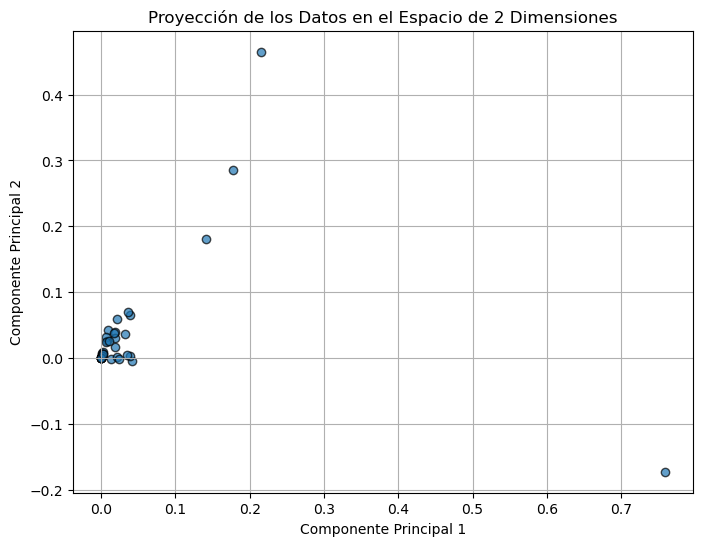

In [13]:
from funcionesTP2 import graficar_proyeccion 
graficar_proyeccion(ACriCri_proyectada)

Sin embargo, no se pueden identificar dos clusters. La gran mayoría de los datos se encuentra agrupados entre el 0 y el 0.1. Luego, realizamos el mismo procedimiento para la matriz de Nicaragua. 

In [14]:
ANicNic_normalizada = np.dot(E_40, ANicNic)

CN = np.dot(ANicNic_normalizada.T, ANicNic_normalizada) / 39

In [15]:
v1N, lambda1N = metodo_de_la_potencia(CN)
print("Primer autovalor:", lambda1N)
print("Primer autovector:", v1N)


CN_prima = CN - lambda1N * np.outer(v1N, v1N)
v2N, lambda2N = metodo_de_la_potencia(CN_prima)
print("Segundo autovalor:", lambda2N)
print("Segundo autovector:", v2N)

Primer autovalor: 0.01796782476553473
Primer autovector: [ 1.02103631e-01  1.91478556e-02  0.00000000e+00  6.54205110e-03
  4.97041145e-01  4.91643276e-01  3.62045431e-01  2.38073365e-01
  1.21259005e-02  4.16474381e-01  2.37262251e-03  1.18292608e-02
  2.31912762e-03  3.67832068e-01  1.14166611e-02  1.05256716e-03
  2.40382369e-02  2.41173842e-02  1.98541367e-02  2.03569904e-02
  4.78619914e-03  1.44242197e-02  6.54205109e-03  1.40632846e-02
  5.74938127e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.24143814e-02
  9.11136799e-03  6.63416249e-03 -3.92690496e-05  1.69357631e-02
  6.53354413e-04  7.88531628e-03  1.90924853e-03  1.89451897e-02]
Segundo autovalor: 0.004234854358232593
Segundo autovector: [ 0.07361176  0.16330527  0.          0.13451461 -0.07774112 -0.06464445
  0.01196072  0.12141312  0.2083271  -0.04309013  0.06349291  0.08539416
  0.12091826 -0.02896107  0.19250405  0.02623241  0.28031704  0.27385512
  0.26332232 

In [16]:
ANicNic_proyectada = proyectar_datos(ANicNic, v1N, v2N)
print(ANicNic_proyectada)

[[ 8.41006496e-01 -4.58136604e-02]
 [ 4.10838107e-02  1.01149339e-03]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.68487304e-03  2.21816784e-02]
 [ 2.26126324e-02  1.51453322e-02]
 [ 2.63789218e-02  2.45498166e-03]
 [ 9.37655583e-03  1.77670657e-02]
 [ 3.56296120e-02  3.08716413e-02]
 [ 1.50438114e-03  1.05834799e-02]
 [ 3.31983516e-05  6.60224438e-05]
 [ 1.16128431e-03  4.69602863e-03]
 [ 1.99399912e-03  2.41423074e-02]
 [ 1.34813686e-04  1.83227943e-03]
 [ 4.14253739e-02  2.06792555e-02]
 [ 4.89263642e-03  1.31656454e-02]
 [ 2.07731895e-02  1.59591905e-01]
 [ 5.47148774e-03  3.34224782e-02]
 [ 7.76523361e-04  5.00094334e-03]
 [ 1.10870851e-03  3.33852106e-03]
 [ 6.69181055e-03  2.74486043e-02]
 [ 3.37273994e-03  5.07360955e-02]
 [ 1.89553927e-03  2.31231836e-02]
 [ 8.05050915e-04  7.44545318e-03]
 [ 2.86819604e-03  2.47608791e-02]
 [ 8.59992151e-04  9.40694099e-03]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0

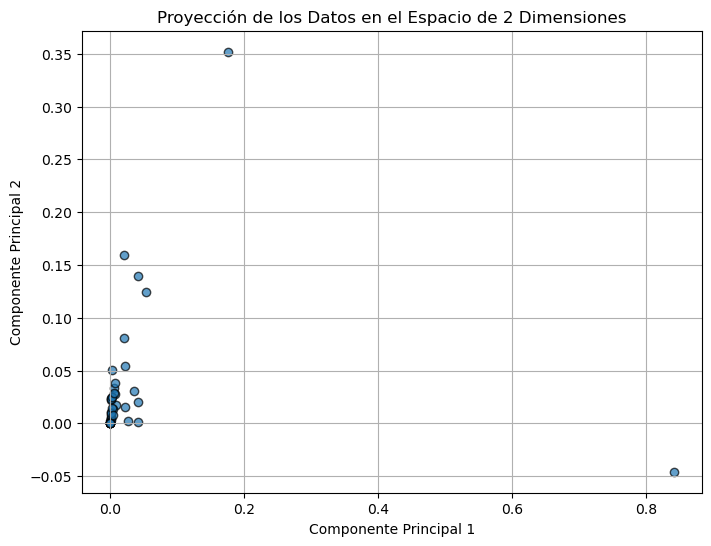

In [17]:
graficar_proyeccion(ANicNic_proyectada)

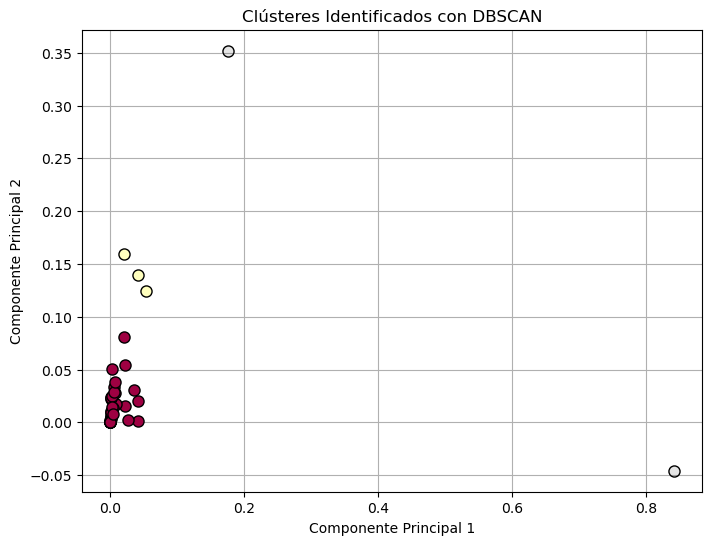

In [18]:
from sklearn.cluster import DBSCAN

# Parámetros de DBSCAN
epsilon = 0.05  # Distancia máxima entre dos puntos para que se consideren vecinos
min_samples = 3  # Número mínimo de puntos para formar un clúster

# Ejecutar DBSCAN en los datos proyectados
clustering = DBSCAN(eps=epsilon, min_samples=min_samples).fit(ANicNic_proyectada)
labels = clustering.labels_

# Gráfico de los resultados de clustering
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Color para ruido (puntos que no pertenecen a ningún clúster)
        col = [0, 0, 0, 0.1]

    class_member_mask = (labels == k)
    xy = ANicNic_proyectada[class_member_mask]

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

plt.title('Clústeres Identificados con DBSCAN')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

**Consigna 9**

Sea la matriz $H=A(I-A)^{-1}$ , por lo visto en el punto 1), podemos reescribir a la matriz $(I-A)^{-1}$ como:

$$(I-A)^{-1}=\sum_{i=0}^{∞}A^i$$

Quedandonos:

$$H=A\sum_{i=0}^{∞}A^i$$

Observando mas a fondo el comportamiento de la sumatoria con $A$:

$A\sum_{i=0}^{∞}A^i=A(I+A+A^2+\dots+A^n)$

Distribuimos:

$A\sum_{i=0}^{∞}A^i=(A+A^2+A^3+\dots+A^n+1)$

Por lo que nuetra sumatoria ahora empezera sumando las potencias de la matriz $A$ desde $i=1$.

Finalmente nos queda que:

$$H=\sum_{i=1}^{∞}A^i$$

Por lo que $H$ es la matriz de la suma de las potencias de desde $i\geq1$



**Consigna 10**

Para calcular la matriz **H**, tomamos la matriz **A** del modelo de Leontief para dos regiones y luego repetimos lo hecho en las consignas 7 y 8. 

Primer autovalor: 2.9442579224507923e-05
Primer autovector: [1.98295178e-04 7.07643618e-03 0.00000000e+00 2.15301115e-02
 2.03727664e-04 1.04558906e-03 4.18200390e-03 3.69380443e-04
 1.08317229e-03 5.19729942e-02 2.47607727e-02 5.06774549e-03
 4.27529696e-01 5.89052825e-03 1.43732778e-03 4.65946040e-04
 2.52238073e-03 3.97988242e-03 5.47987728e-03 2.10894217e-03
 2.99014575e-03 6.26005518e-03 1.02233927e-02 3.39079448e-03
 8.63185109e-03 2.16586887e-03 3.22872585e-03 4.14468554e-02
 7.40428180e-04 5.78730430e-02 0.00000000e+00 8.98843905e-01
 1.65303707e-03 1.28383015e-03 1.52250164e-04 6.39085524e-04
 1.75825525e-03 1.17962110e-03 1.41023918e-04 7.51063559e-05]
Segundo autovalor: 3.8534647281481405e-06
Segundo autovector: [ 4.66388716e-04  1.16772534e-02  0.00000000e+00  1.07434291e-01
  2.49346133e-03  5.11425565e-03  2.93087052e-02  2.15567967e-03
  4.71557701e-03  2.67917795e-01  4.86954925e-02  1.86079876e-02
  8.25991613e-01  4.22306691e-02  4.96059400e-03  6.92923142e-04
  6.426

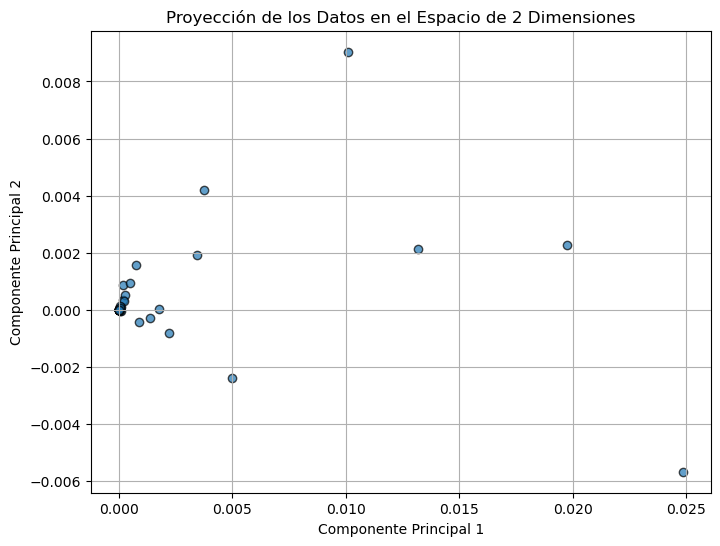

In [19]:
H = np.dot(ACriCri, IdCri_inv)
H_normalizada = np.dot(E_40, H)

C10 = np.dot(H_normalizada.T, H_normalizada) / 39

v1_H, lambda1_H = metodo_de_la_potencia(C10)
print("Primer autovalor:", lambda1_H)
print("Primer autovector:", v1_H)

C10_prima = C10 - lambda1_H * np.outer(v1_H, v1_H)
v2_H, lambda2_H = metodo_de_la_potencia(C10_prima)
print("Segundo autovalor:", lambda2_H)
print("Segundo autovector:", v2_H)

H_proyectada = proyectar_datos(H, v1_H, v2_H)
graficar_proyeccion(H_proyectada)

**Consigna 11**

(31, 7.040545865270159e-12)
(31, 1.9766446378651348e-05)


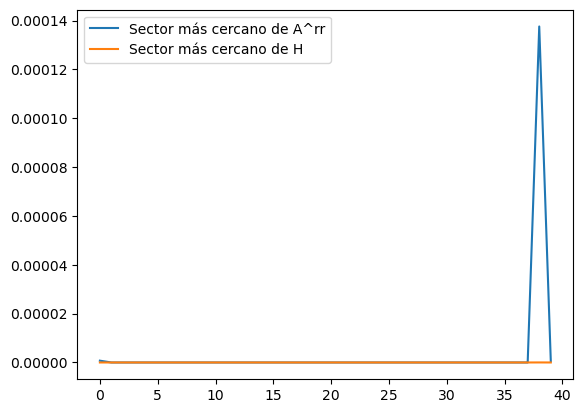

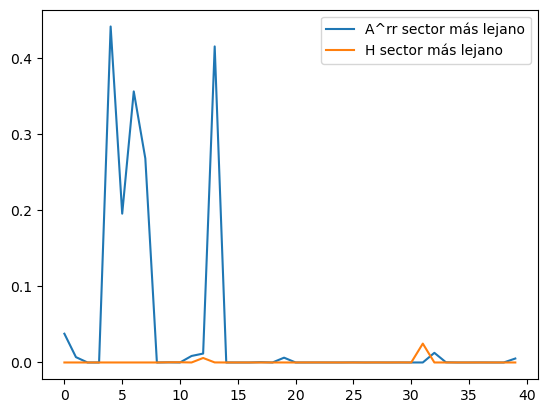

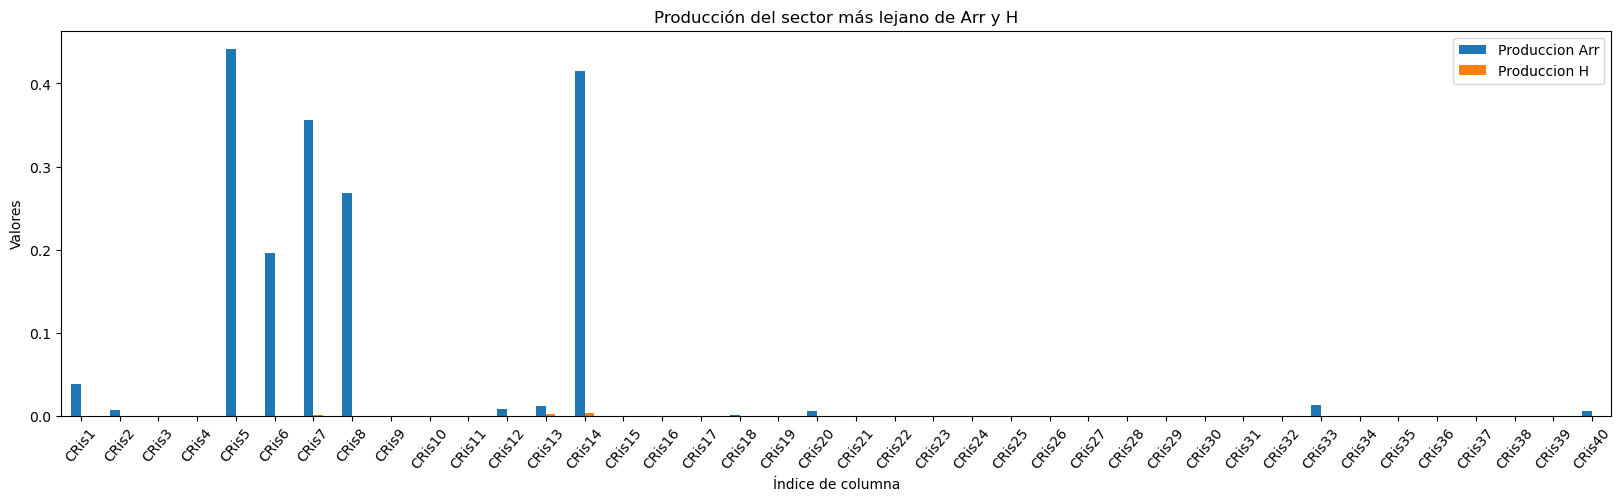

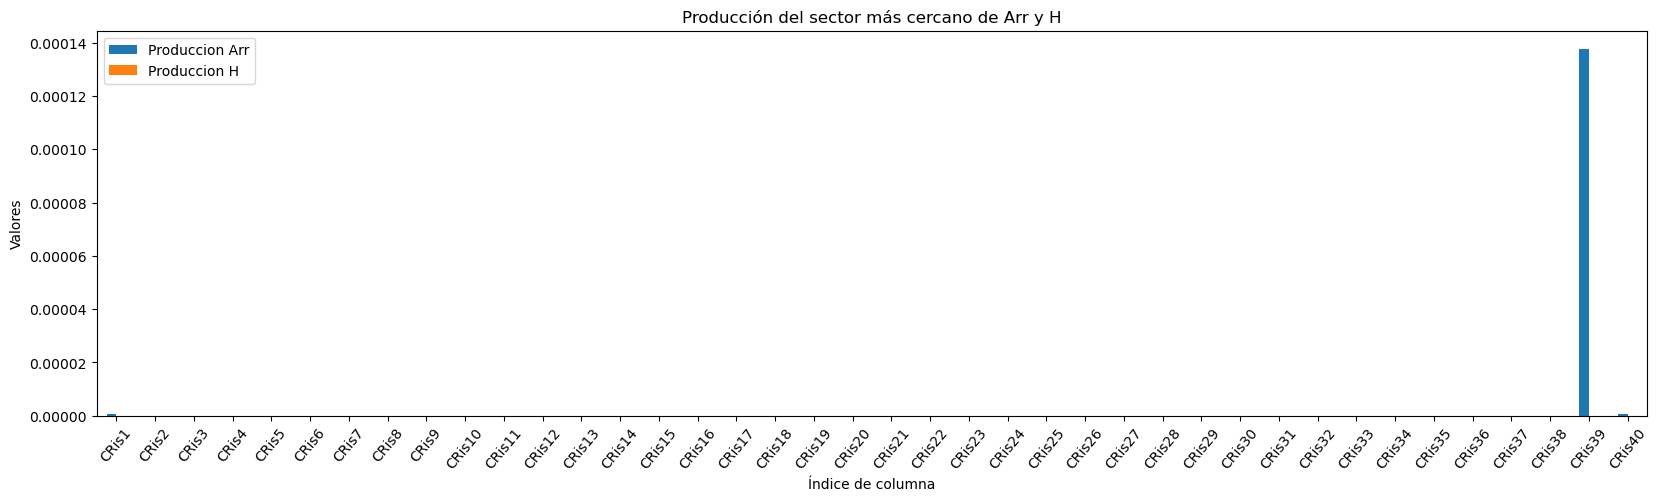

In [28]:
#%% EJERCICIO 11

#sectores de Arr
distancias_Arr = np.sqrt(np.sum(ACriCri_proyectada**2, axis=1))
indice_mas_cercano_Arr = np.argmin(distancias_Arr)
indice_mas_lejano_Arr = np.argmax(distancias_Arr)

#sectores de H
distancias_H = np.sqrt(np.sum(H_proyectada**2, axis=1))
indice_mas_cercano_H = np.argmin(distancias_H)
indice_mas_lejano_H = np.argmax(distancias_H)

Cri_col = [] 


for i in range(len(distancias_Arr)): 
    if distancias_H[i] != 0 and  distancias_H[i] < distancia_minima_no_cero_H[1]:
        distancia_minima_no_cero_H = (i,distancias_H[i])



distancia_minima_no_cero_Arr = (100,100)
for i in range(len(distancias_Arr)): 
    if distancias_Arr[i] != 0 and  distancias_Arr[i] < distancia_minima_no_cero_Arr[1]:
        distancia_minima_no_cero_Arr = (i,distancias_Arr[i])

print(distancia_minima_no_cero_Arr)
for i in range(1,41): #Crea la lista de columnas a filtrar
    Cri_col.append('CRis'+str(i))


#grafico distancias al origen 
plt.plot(ACriCri[distancia_minima_no_cero_Arr[0]],label="Sector más cercano de A^rr")
plt.plot(H[distancia_minima_no_cero_H[0]],label="Sector más cercano de H")
plt.legend()
plt.title("")
plt.show()

plt.plot(ACriCri[indice_mas_lejano_Arr], label="A^rr sector más lejano")
plt.plot(H[indice_mas_lejano_H], label="H sector más lejano")
plt.legend()
plt.title("")
plt.show()

#grafico producción
Arr_g=pd.DataFrame({"Produccion Arr":ACriCri[indice_mas_lejano_Arr],"Produccion H":H[indice_mas_lejano_Arr]})
Arr_g.index = Cri_col
Arr_g.plot(kind="bar",title="Producción del sector más lejano de Arr y H",figsize=(20,5),rot=50)
plt.legend()
plt.xlabel("Índice de columna")
plt.ylabel("Valores")
plt.show()

Arr_c=pd.DataFrame({"Produccion Arr":ACriCri[distancia_minima_no_cero_Arr[0]],"Produccion H":H[distancia_minima_no_cero_H[0]]})
Arr_c.index = Cri_col
Arr_c.plot(kind="bar",title="Producción del sector más cercano de Arr y H",figsize=(20,5),rot=50)
plt.legend()
plt.xlabel("Índice de columna")
plt.ylabel("Valores")
plt.show()

